In [338]:
#%pip install pm4py

In [339]:
# Importa bibliotecas para visualização e mineração de dados
import pandas as pd
import pm4py

In [340]:
# Event log da unidade 1
df_1 = pd.read_csv('data/movimentos_unidade_1.csv', sep=',')
df_1.head()

,NPU,processoID,activity,dataInicio,dataFinal,duration,classe,assunto,movimentoID,complemento,documento
0,0052885-00.2022.0.00.0000,186510447,Distribuição,2022-10-24T23:46:31.769726000,2022-10-24T23:46:31.769726000,0,Procedimento do Juizado Especial Cível,Obrigação de Fazer / Não Fazer,26,sorteio,NaN
1,0052885-00.2022.0.00.0000,186510447,Audiência,2022-10-24T23:46:31.769726000,2022-10-24T23:46:32.593726000,0,Procedimento do Juizado Especial Cível,Obrigação de Fazer / Não Fazer,970,designada,NaN
2,0052885-00.2022.0.00.0000,186510447,Audiência,2022-12-14T12:58:53.104726000,2022-12-14T17:22:17.040726000,15803,Procedimento do Juizado Especial Cível,Obrigação de Fazer / Não Fazer,970,cancelada,NaN
3,0052885-00.2022.0.00.0000,186510447,Expedição de documento,2022-12-14T17:22:17.040726000,2022-12-14T17:23:34.820726000,77,Procedimento do Juizado Especial Cível,Obrigação de Fazer / Não Fazer,60,Certidão,CERTIDÃO
4,0052230-00.2022.0.00.0000,186919890,Expedição de documento,2022-10-21T17:40:19.013726000,2022-11-18T04:30:16.725726000,2371797,Procedimento do Juizado Especial Cível,Obrigação de Fazer / Não Fazer,60,Outros documentos,CERTIDÃO


In [341]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243768 entries, 0 to 243767
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   NPU          243768 non-null  object
 1   processoID   243768 non-null  int64 
 2   activity     243768 non-null  object
 3   dataInicio   243768 non-null  object
 4   dataFinal    243768 non-null  object
 5   duration     243768 non-null  int64 
 6   classe       243768 non-null  object
 7   assunto      243768 non-null  object
 8   movimentoID  243768 non-null  int64 
 9   complemento  105276 non-null  object
 10  documento    145980 non-null  object
dtypes: int64(3), object(8)
memory usage: 20.5+ MB


In [342]:
# Event log da unidade 2
df_2 = pd.read_csv('data/movimentos_unidade_2.csv', sep=',')
#df_2.head()

In [343]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239001 entries, 0 to 239000
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   NPU          239001 non-null  object
 1   processoID   239001 non-null  int64 
 2   activity     239001 non-null  object
 3   dataInicio   239001 non-null  object
 4   dataFinal    239001 non-null  object
 5   duration     239001 non-null  int64 
 6   classe       239001 non-null  object
 7   assunto      239001 non-null  object
 8   movimentoID  239001 non-null  int64 
 9   complemento  98337 non-null   object
 10  documento    153821 non-null  object
dtypes: int64(3), object(8)
memory usage: 20.1+ MB


In [344]:
# Quantidade de movimentos e a sua frequência nos Processos judiciais (cases/ eventos)
print("-----Movimentos-----\nUNIDADE 1:\n{}".format(df_1['activity'].value_counts()))
print("\nUNIDADE 2:\n{}".format(df_2['activity'].value_counts()))

-----Movimentos-----
UNIDADE 1:
activity
Expedição de documento    54370
Petição                   49531
Conclusão                 29960
Audiência                 27106
Definitivo                14066
                          ...  
Provimento em Parte           1
Outras Decisões               1
Convenção das Partes          1
Suspensão do Processo         1
Pena / Medida                 1
Name: count, Length: 90, dtype: int64

UNIDADE 2:
activity
Expedição de documento                                                  54907
Petição                                                                 48624
Conclusão                                                               28414
Audiência                                                               25498
Documento                                                               16377
                                                                        ...  
Por decisão judicial                                                        1
Im

É necessário, para um bom funcionamento dos algoritmos no pm4py, que exista pelo menos um atributo do tipo datetime e que o atributo identificador seja do tipo string no event log

In [345]:
# Converter as colunas 'dataInicio' e 'dataFinal' para o tipo datetime
df_1['dataInicio'] = pd.to_datetime(df_1['dataInicio'])
df_1['dataFinal'] = pd.to_datetime(df_1['dataFinal'])

df_2['dataInicio'] = pd.to_datetime(df_2['dataInicio'])
df_2['dataFinal'] = pd.to_datetime(df_2['dataFinal'])

In [346]:
# Converter a coluna 'processoID' para string
df_1['processoID'] = df_1['processoID'].astype(str)
df_2['processoID'] = df_2['processoID'].astype(str)

In [347]:
#quantidade de registros
num_events_1 = len(df_1)
num_events_2 = len(df_2)

#quantidade de ids unicos 
num_cases_1 = len(df_1['processoID'].unique())
num_cases_2 = len(df_2['processoID'].unique())
print("Número de eventos | unidade 1: {} | unidade 2: {}\nNumero de casos | unidade 1: {} | unidade 2: {}".format(num_events_1, num_events_2, num_cases_1, num_cases_2))

Número de eventos | unidade 1: 243768 | unidade 2: 239001
Numero de casos | unidade 1: 8301 | unidade 2: 7683


Unindo os campos complemento e documento para os movimentos de Petição,Expedição de Documento, Mero Expediente, Mandado e Audiência

In [ ]:
# Lista com os ids dos movimentos
movement_ids = [85, 12271, 60, 11010, 106, 985, 970]
df_array = [df_1, df_2]

for i in range(0, 2):
    # Substitui NaN por string vazia antes de concatenar
    df_array[i]["complemento"] = df_array[i]["complemento"].fillna("")
    df_array[i]["documento"] = df_array[i]["documento"].fillna("")

    # Adiciona a coluna 'org:resource' com valores vazios, se ainda não existir
    if "org:resource" not in df_array[i].columns:
        df_array[i]["org:resource"] = ""

    for id in movement_ids:
        # Preenchendo o campo 'org:resource' apenas para registros onde 'movimentoID' é igual ao id atual
        # e o campo 'org:resource' ainda está vazio
        df_array[i]["org:resource"] = df_array[i].apply(
            lambda row: (row["complemento"] + ", " + row["documento"]).strip(", ") 
            if row["movimentoID"] == id and row["org:resource"] == "" else row["org:resource"], axis=1
        )

In [349]:
#fomatando event logs para que possam ser usado na biblioteca pm4py 
event_log_1 = pm4py.format_dataframe(df_1, case_id='processoID', activity_key='activity', timestamp_key='dataFinal', timest_format= '%Y-%m-%d %H:%M:%S%z')
#retornando atividades de início e fim
start_activities_1 = pm4py.get_start_activities(event_log_1)
end_activities_1 = pm4py.get_end_activities(event_log_1)

event_log_2 = pm4py.format_dataframe(df_2, case_id='processoID', activity_key='activity', timestamp_key='dataFinal', timest_format= '%Y-%m-%d %H:%M:%S%z')
start_activities_2 = pm4py.get_start_activities(event_log_2)
end_activities_2 = pm4py.get_end_activities(event_log_2)
print("Atividades iniciais - unidade 1: {} | unidade 2: {}\nAtividades finais - unidade 1: {} | unidade 2: {}".format(start_activities_1, start_activities_2, end_activities_1, end_activities_2))

Atividades iniciais - unidade 1: {'Distribuição': 8301} | unidade 2: {'Distribuição': 7683}
Atividades finais - unidade 1: {'Definitivo': 8301} | unidade 2: {'Definitivo': 7683}


In [350]:
event_log_1.head()

,NPU,processoID,activity,dataInicio,dataFinal,duration,classe,assunto,movimentoID,complemento,documento,org:resource,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
0,0037674-00.2022.0.00.0000,101551646,Distribuição,2022-07-27 19:31:26.932726+00:00,2022-07-27 19:31:26.932726+00:00,0,Procedimento do Juizado Especial Cível,Abatimento proporcional do preço,26,sorteio,,,101551646,Distribuição,2022-07-27 19:31:26.932726+00:00,0,0
1,0037674-00.2022.0.00.0000,101551646,Audiência,2022-07-27 19:31:26.932726+00:00,2022-07-27 19:31:54.394726+00:00,27,Procedimento do Juizado Especial Cível,Abatimento proporcional do preço,970,designada,,designada,101551646,Audiência,2022-07-27 19:31:54.394726+00:00,1,0
2,0037674-00.2022.0.00.0000,101551646,Expedição de documento,2022-07-27 19:31:54.394726+00:00,2022-07-28 13:04:53.084726+00:00,63178,Procedimento do Juizado Especial Cível,Abatimento proporcional do preço,60,Outros documentos,CITAÇÃO,"Outros documentos, CITAÇÃO",101551646,Expedição de documento,2022-07-28 13:04:53.084726+00:00,2,0
3,0037674-00.2022.0.00.0000,101551646,Petição,2022-07-28 13:04:53.084726+00:00,2022-09-01 17:14:47.796726+00:00,3038994,Procedimento do Juizado Especial Cível,Abatimento proporcional do preço,85,,CERTIDÃO,CERTIDÃO,101551646,Petição,2022-09-01 17:14:47.796726+00:00,3,0
4,0037674-00.2022.0.00.0000,101551646,Audiência,2022-09-01 17:14:47.796726+00:00,2022-09-15 16:29:32.693726+00:00,1206884,Procedimento do Juizado Especial Cível,Abatimento proporcional do preço,970,cancelada,,cancelada,101551646,Audiência,2022-09-15 16:29:32.693726+00:00,4,0


O formato de arquivo XES é baseado no formato XML e permite que descrevamos comportamentos de processos

In [351]:
# Salvar o DataFrame como um arquivo .xes usando pm4py
#pm4py.write_xes(event_log_1, 'movimentos_unidade_1.xes', case_id_key='processoID')

## Retirada de movimentos insignificantes

movimentos como "Publicação", "Decurso de Prazo", "Conclusão" e "Disponibilização no Diário da Justiça Eletrônico" são frequentemente repetidos, e não são úteis, pois não contribuem de maneira significativa para a análise.


In [352]:
def filter_and_report(event_log_1, event_log_2, values_to_filter, event_description):
    # Filtra os logs com base nos valores especificados
    filtered_event_log_1 = pm4py.filter_event_attribute_values(log=event_log_1, attribute_key="concept:name", level="event", values=values_to_filter, retain=False)
    filtered_event_log_2 = pm4py.filter_event_attribute_values(log=event_log_2, attribute_key="concept:name", level="event", values=values_to_filter, retain=False)
    
    # Imprime o relatório
    print(f"\nRetirada dos movimentos de {event_description}")
    print(f"Processos judiciais -> Unidade 1: {len(filtered_event_log_1)} | Unidade 2: {len(filtered_event_log_2)}")
    print(f"Movimentos -> Unidade 1: {len(filtered_event_log_1['activity'].unique())} | Unidade 2: {len(filtered_event_log_2['activity'].unique())}")

    return filtered_event_log_1, filtered_event_log_2

# Lista de valores e descrições
filter_events = [
    ({"Publicação"}, "Publicação"),
    ({"Decurso de Prazo"}, "Decurso de Prazo"),
    ({"Conclusão"}, "Conclusão"),
    ({"Disponibilização no Diário da Justiça Eletrônico"}, "Disponibilização no Diário da Justiça Eletrônico")
]

#Tamanho atual dos event logs
print("Processos judiciais -> Unidade 1: {} | Unidade 2: {}".format(len(event_log_1) ,len(event_log_2)))

# Aplicação da função para cada evento
for values, description in filter_events:
    event_log_1, event_log_2 = filter_and_report(event_log_1, event_log_2, values, description)

Processos judiciais -> Unidade 1: 243768 | Unidade 2: 239001

Retirada dos movimentos de Publicação
Processos judiciais -> Unidade 1: 243768 | Unidade 2: 239001
Movimentos -> Unidade 1: 90 | Unidade 2: 101

Retirada dos movimentos de Decurso de Prazo
Processos judiciais -> Unidade 1: 241626 | Unidade 2: 236045
Movimentos -> Unidade 1: 89 | Unidade 2: 100

Retirada dos movimentos de Conclusão
Processos judiciais -> Unidade 1: 211666 | Unidade 2: 207631
Movimentos -> Unidade 1: 88 | Unidade 2: 99

Retirada dos movimentos de Disponibilização no Diário da Justiça Eletrônico
Processos judiciais -> Unidade 1: 211666 | Unidade 2: 207631
Movimentos -> Unidade 1: 88 | Unidade 2: 99


## Eventos documentados

Quantidade e tipos de eventos que possuem o atributo documento preenchido 

In [353]:
import numpy as np

# Cria uma lista com os possíveis valores do atributo documento  
doc_arrray_1 = event_log_1['documento'].unique()
doc_arrray_2 = event_log_2['documento'].unique()
# Retira o valor NaN da lista
doc_arrray_1 = np.delete(doc_arrray_1, 0)
doc_arrray_2 = np.delete(doc_arrray_1, 0)
#doc_arrray

In [354]:
# Filtra o event log para que retorne somente os eventos com o atributo documento preenchido
doc_event_log_1 = pm4py.filter_event_attribute_values(log=event_log_1, attribute_key="documento", level="event", values=doc_arrray_1, retain=True)
doc_event_log_2 = pm4py.filter_event_attribute_values(log=event_log_1, attribute_key="documento", level="event", values=doc_arrray_2, retain=True)


In [355]:
print(f"Quantidade de processos com documentação específica - Unidade 1: {len(doc_event_log_1)} | Unidade 2: {len(doc_event_log_2)}")

Quantidade de processos com documentação específica - Unidade 1: 145978 | Unidade 2: 135841


In [356]:
# Tipos de processos documentados mais frequêntes 
print("UINDADE 1")
print(doc_event_log_1['activity'].value_counts())
print("\nUINDADE 2")
print(doc_event_log_2['activity'].value_counts())

UINDADE 1
activity
Expedição de documento                                 51229
Petição                                                47675
Mero expediente                                        10646
Documento                                               8967
Audiência                                               8152
                                                       ...  
Convenção das Partes                                       1
Renúncia ao direito pelo autor                             1
Conhecimento em Parte e Não-Provimento ou Denegação        1
Suscitação de Conflito de Competência                      1
Pena / Medida                                              1
Name: count, Length: 65, dtype: int64

UINDADE 2
activity
Petição                                                47675
Expedição de documento                                 41098
Mero expediente                                        10646
Documento                                               8961
Audiênci

## Agrupamento de movimentos similares

In [357]:
import json

file_path = 'data/cnj-movimentos-tree.json'

# Ler o JSON do arquivo
with open(file_path, 'r') as f:
    movements_tree = json.load(f)
#data.items()

In [358]:
# Cria um novo DataFrame que contém apenas as colunas 'movimentoID' e 'activity'
movements_1 = event_log_1[['movimentoID', 'activity']]
movements_1

,movimentoID,activity
0,26,Distribuição
1,970,Audiência
2,60,Expedição de documento
3,85,Petição
4,970,Audiência
...,...,...
243763,60,Expedição de documento
243764,85,Petição
243765,11383,Ato ordinatório
243766,60,Expedição de documento


Baseado na Tabela de Padronização de Unidades ([TPU](https://www.cnj.jus.br/sgt/consulta_publica_movimentos.php)) do CNJ temos a informação de alguns movimentoIDs que não estão especificados no dataframe    
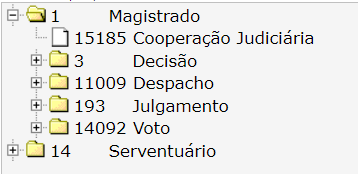  


In [359]:
# Converte dataframe para o formato de dicionário
movements_dic = movements_1.set_index('movimentoID')['activity'].to_dict()

# Adiciona os movimentos a serem agrupados e seus respectivos movimentoIDs no dicionário
movimentos_para_agrupamento = [(3, 'Decisão'), (11009, 'Despacho'), (193, 'Julgamento'), (14092, 'Voto'), (12430, 'Arquivamento'), (228, 'Arquivamento'),  (1, 'Magistrado'), (14, 'Serventuário')]

# Adicionando novas chaves e valores no dicionário
for (chave, valor) in movimentos_para_agrupamento:
    movements_dic[chave] = valor

movements_dic.items()

dict_items([(26, 'Distribuição'), (970, 'Audiência'), (60, 'Expedição de documento'), (85, 'Petição'), (48, 'Escrivão/Diretor de Secretaria/Secretário Jurídico'), (985, 'Mandado'), (106, 'Mandado'), (219, 'Procedência'), (11010, 'Mero expediente'), (123, 'Remessa'), (246, 'Definitivo'), (785, 'Antecipação de tutela'), (220, 'Improcedência'), (466, 'Homologação de Transação'), (200, 'Não-Acolhimento de Embargos de Declaração'), (848, 'Trânsito em julgado'), (10966, 'Mudança de Classe Processual'), (221, 'Procedência em Parte'), (849, 'Reativação'), (11383, 'Ato ordinatório'), (12142, 'Mudança de Parte'), (581, 'Documento'), (458, 'Abandono da causa'), (332, 'Antecipação de tutela'), (893, 'Desarquivamento'), (198, 'Acolhimento de Embargos de Declaração'), (461, 'Ausência das condições da ação'), (36, 'Redistribuição'), (460, 'Perempção, litispendência ou coisa julgada'), (14739, 'Evolução da Classe Processual'), (132, 'Recebimento'), (196, 'Extinção da execução ou do cumprimento da sent

In [360]:
# Função para substituir IDs usando o dicionário de substituições
def substituir_chaves(tree, dictionary):
    novo_dicionario = {}
    for chave, valor in tree.items():
        nova_chave = dictionary.get(int(chave), chave)  # Usa o valor do dicionário de substituições ou mantém a chave original
        if isinstance(valor, dict):
            novo_dicionario[nova_chave] = substituir_chaves(valor, dictionary)
        else:
            novo_dicionario[nova_chave] = valor
    return novo_dicionario

# Substituir chaves
new_tree = substituir_chaves(movements_tree, movements_dic)

print(json.dumps(new_tree, indent=2, ensure_ascii=False))

{
  "Serventuário": {
    "15": {
      "979": {},
      "980": {},
      "16": {
        "478": {},
        "479": {},
        "480": {},
        "481": {}
      }
    },
    "18": {
      "Baixa Definitiva": {},
      "Distribuição": {},
      "Redistribuição": {},
      "488": {},
      "981": {},
      "982": {},
      "12296": {},
      "12297": {}
    },
    "Escrivão/Diretor de Secretaria/Secretário Jurídico": {
      "12165": {
        "12166": {
          "12167": {},
          "12168": {},
          "12169": {},
          "12170": {},
          "12171": {},
          "12172": {}
        },
        "12173": {
          "12174": {},
          "12175": {},
          "12176": {},
          "12177": {},
          "12178": {},
          "12179": {}
        }
      },
      "12198": {
        "15021": {},
        "12199": {
          "12200": {},
          "12201": {},
          "12202": {},
          "12212": {}
        },
        "12203": {},
        "12204": {},
        "12205": 

In [361]:
# Função para encontrar o caminho da árvore até o movimento procurado
def encontrar_caminho(tree, alvo, caminho=None):
    if caminho is None:
        caminho = []

    for chave, valor in tree.items():
        caminho_atual = caminho + [chave]
        
        if chave == alvo:
            return caminho_atual

        # Se a instancia for uma tupla de chave e dicionário
        if isinstance(valor, dict):
            resultado = encontrar_caminho(valor, alvo, caminho_atual)
            if resultado:
                return resultado
    
    return None

# Lista para armazenar os primeiros nós
primeiros_nos = []

elementos_procurados = ['Decisão', 'Despacho', 'Julgamento', 'Voto', 'Arquivamento']

def find_path(moviments_array):
# Encontrar o caminho e armazenar o primeiro nó de cada caminho
    for alvo in moviments_array:  # Usando a lista de atividades únicas
        caminho = encontrar_caminho(new_tree, alvo)
        if caminho:
            print(f"O elemento '{alvo}' pertence à estrutura: {' -> '.join(caminho)}")
            # Armazenar o primeiro nó do caminho encontrado
            primeiros_nos.append(caminho[0])
        else:
            (f"O elemento '{alvo}' não foi encontrado.")
    return primeiros_nos

# Exibir os primeiros nós coletados
find_path(elementos_procurados)


O elemento 'Decisão' pertence à estrutura: Magistrado -> Decisão
O elemento 'Despacho' pertence à estrutura: Magistrado -> Despacho
O elemento 'Julgamento' pertence à estrutura: Magistrado -> Julgamento
O elemento 'Voto' pertence à estrutura: Magistrado -> Voto
O elemento 'Arquivamento' pertence à estrutura: Magistrado -> Decisão -> 1013 -> Arquivamento


['Magistrado', 'Magistrado', 'Magistrado', 'Magistrado', 'Magistrado']

Com a manipulaçãos dos dados no arquivo json podemos verificar que os movimentos Decisão, Despacho, Julgamento, Voto e Arquivamento estão todos dentro da categoria **Magistrado**

Passamos agora para etapa de alteração desses movimentos no nosso dataset

In [362]:
event_logs = [event_log_1, event_log_2]

# Percorre a lista de movimentos que desejamos agrupar
for alvo in elementos_procurados:
    # Para cada movimento, o código abaixo será executado para as unidades 1 e 2
    for i in range(0, 2):
        # Cria uma máscara para selecionar as linhas onde 'activity' é igual ao movimento alvo
        mask = event_logs[i]['activity'] == alvo
        # Atualiza apenas as linhas selecionadas para o valor 'Magistrado' e o id para 1
        event_logs[i].loc[mask, 'activity'] = 'Magistrado'
        event_logs[i].loc[mask, 'movimentoID'] = 1

In [363]:
from collections import Counter

for i in range(0, 2):
    # Movimentos 'origem' de todos os movimentos do dataframe
    movement_roots = find_path(event_logs[i]['activity'].unique())
    # Usando Counter para contar as ocorrências
    count = Counter(movement_roots)
    print(f"Unidade {i+1}: {count}")

O elemento 'Distribuição' pertence à estrutura: Serventuário -> 18 -> Distribuição
O elemento 'Audiência' pertence à estrutura: Serventuário -> Escrivão/Diretor de Secretaria/Secretário Jurídico -> Audiência
O elemento 'Expedição de documento' pertence à estrutura: Serventuário -> Escrivão/Diretor de Secretaria/Secretário Jurídico -> Expedição de documento
O elemento 'Petição' pertence à estrutura: Serventuário -> Escrivão/Diretor de Secretaria/Secretário Jurídico -> 67 -> Petição
O elemento 'Escrivão/Diretor de Secretaria/Secretário Jurídico' pertence à estrutura: Serventuário -> Escrivão/Diretor de Secretaria/Secretário Jurídico
O elemento 'Mandado' pertence à estrutura: Serventuário -> 104 -> 105 -> Mandado
O elemento 'Procedência' pertence à estrutura: Magistrado -> Julgamento -> 385 -> Procedência
O elemento 'Mero expediente' pertence à estrutura: Magistrado -> Despacho -> Mero expediente
O elemento 'Remessa' pertence à estrutura: Serventuário -> Escrivão/Diretor de Secretaria/Sec

## Especificação de movimentos

É fundamental fornecer um contexto mais claro sobre a execução de determinadas atividades, já que essas atividades podem ocorrer em diferentes momentos ao longo do processo judicial.

Análise dos tipos de documentos e complementos para cada um dos movimentos especificados juntamente com a quantidade de vezes que aparecem para cada tipo de movimento:

In [364]:
# Lista com os ids dos movimentos
movement_ids = [85, 12271, 60, 11010, 106, 985, 970]

# Verificando os valores e frequência de documentos e complementos em cada um dos movimentos
print("UNIDADE 1")
for element in movement_ids:
    nome = event_logs[0][event_logs[0]['movimentoID'] == element]['activity'].unique()
    if len(nome) > 0:  # Verifica se existe ao menos um valor único
        nome = nome[0]  # Acessa o valor único
        print(f"####################### {nome} #######################")
        # Retorna os valores únicos da coluna documentos para as linhas da tabela que são movimentos do tipo especificado 
        print(event_logs[0][event_logs[0]['activity'] == nome]['documento'].value_counts())
        print(event_logs[0][event_logs[0]['activity'] == nome]['complemento'].value_counts())
    else:
        print(f"Movimento ID {element} não encontrado na UNIDADE 1")

print("UNIDADE 2")
for element in movement_ids:
    nome = event_logs[1][event_logs[1]['movimentoID'] == element]['activity'].unique()
    if len(nome) > 0:  # Verifica se existe ao menos um valor único
        nome = nome[0]  # Acessa o valor único
        print(f"####################### {nome} #######################")
        print(event_logs[1][event_logs[1]['activity'] == nome]['documento'].value_counts())
        print(event_logs[1][event_logs[1]['activity'] == nome]['complemento'].value_counts())
    else:
        print(f"Movimento ID {element} não encontrado na UNIDADE 2")


UNIDADE 1
####################### Petição #######################
documento
PETIÇÃO                            14741
CERTIDÃO                            6971
CONTESTAÇÃO                         4944
OUTROS (DOCUMENTO)                  2784
PETIÇÃO EM PDF                      2068
                                   ...  
RECURSO ESPECIAL                       1
AGRAVO RETIDO                          1
EMBARGOS DE DECLARAÇÃO CRIMINAL        1
CERTIDÃO RERRATIFICAÇÃO                1
EMBARGOS INFRINGENTES                  1
Name: count, Length: 84, dtype: int64
complemento
                    49523
Petição (outras)        6
Contestação             2
Name: count, dtype: int64
Movimento ID 12271 não encontrado na UNIDADE 1
####################### Expedição de documento #######################
documento
INTIMAÇÃO                                  24307
CERTIDÃO                                   14565
CITAÇÃO                                    10131
                                            

Para capturar essa diversidade de contextos, o dataset inclui duas colunas específicas — "documento" e "complemento" — que oferecem informações adicionais, permitindo uma especialização mais precisa de alguns desses movimentos.

In [365]:
# Função que discrimina os movimentos pelo documento ou complemento
def discriminate_movement(eventLog, movimentId, complement):
    if (complement == True):
        atribute_name = 'complemento'
    else:
        atribute_name = 'documento'

    eventLog.loc[
        (pd.notna(eventLog[atribute_name])) & # documento não é NaN
        (eventLog['movimentoID'] == movimentId) & # movimentoID é igual ao valor fornecido
        (eventLog[atribute_name] != 'PETIÇÃO'), # documento não é 'PETIÇÃO'
        'activity' # O campo a ser alterado é activity (movimento)
    ] = eventLog['activity'] + ' ' + eventLog[atribute_name] # O novo valor do campo

# Itera sobre todos os elementos do array de movimentos a serem especificados
for element in movement_ids:

    # Nome do movimento
    nome = event_logs[0][event_logs[0]['movimentoID'] == element]['activity'].unique()
    if len(nome) > 0:  # Verifica se existe ao menos um valor único
        nome = nome[0]  # Acessa o valor único
        print(f"-----------------------------------------\n{nome}")
        
    # Para cada event log
    for i in range(0, 2):
        # Caso o movimento seja de Petição ele de ser discriminado por 'documento'
        if (element == 85 | element == 12271 | element == 11010):
            discriminate_movement(eventLog=event_logs[i], movimentId=element, complement=False)
        else:
            discriminate_movement(eventLog=event_logs[i], movimentId=element, complement=True)
        # Exibe o número total de movimentos em cada iteração
        print(f"Movimentos da Unidade {i+1}: {len(event_logs[i]['activity'].unique())}")
    

-----------------------------------------
Petição
Movimentos da Unidade 1: 90
Movimentos da Unidade 2: 103
Movimentos da Unidade 1: 90
Movimentos da Unidade 2: 103
-----------------------------------------
Expedição de documento
Movimentos da Unidade 1: 101
Movimentos da Unidade 2: 114
-----------------------------------------
Mero expediente
Movimentos da Unidade 1: 101
Movimentos da Unidade 2: 114
-----------------------------------------
Mandado
Movimentos da Unidade 1: 104
Movimentos da Unidade 2: 117
-----------------------------------------
Mandado
Movimentos da Unidade 1: 103
Movimentos da Unidade 2: 116
-----------------------------------------
Audiência
Movimentos da Unidade 1: 119
Movimentos da Unidade 2: 131


## Visualização do modelo processual

#### Unidade 1

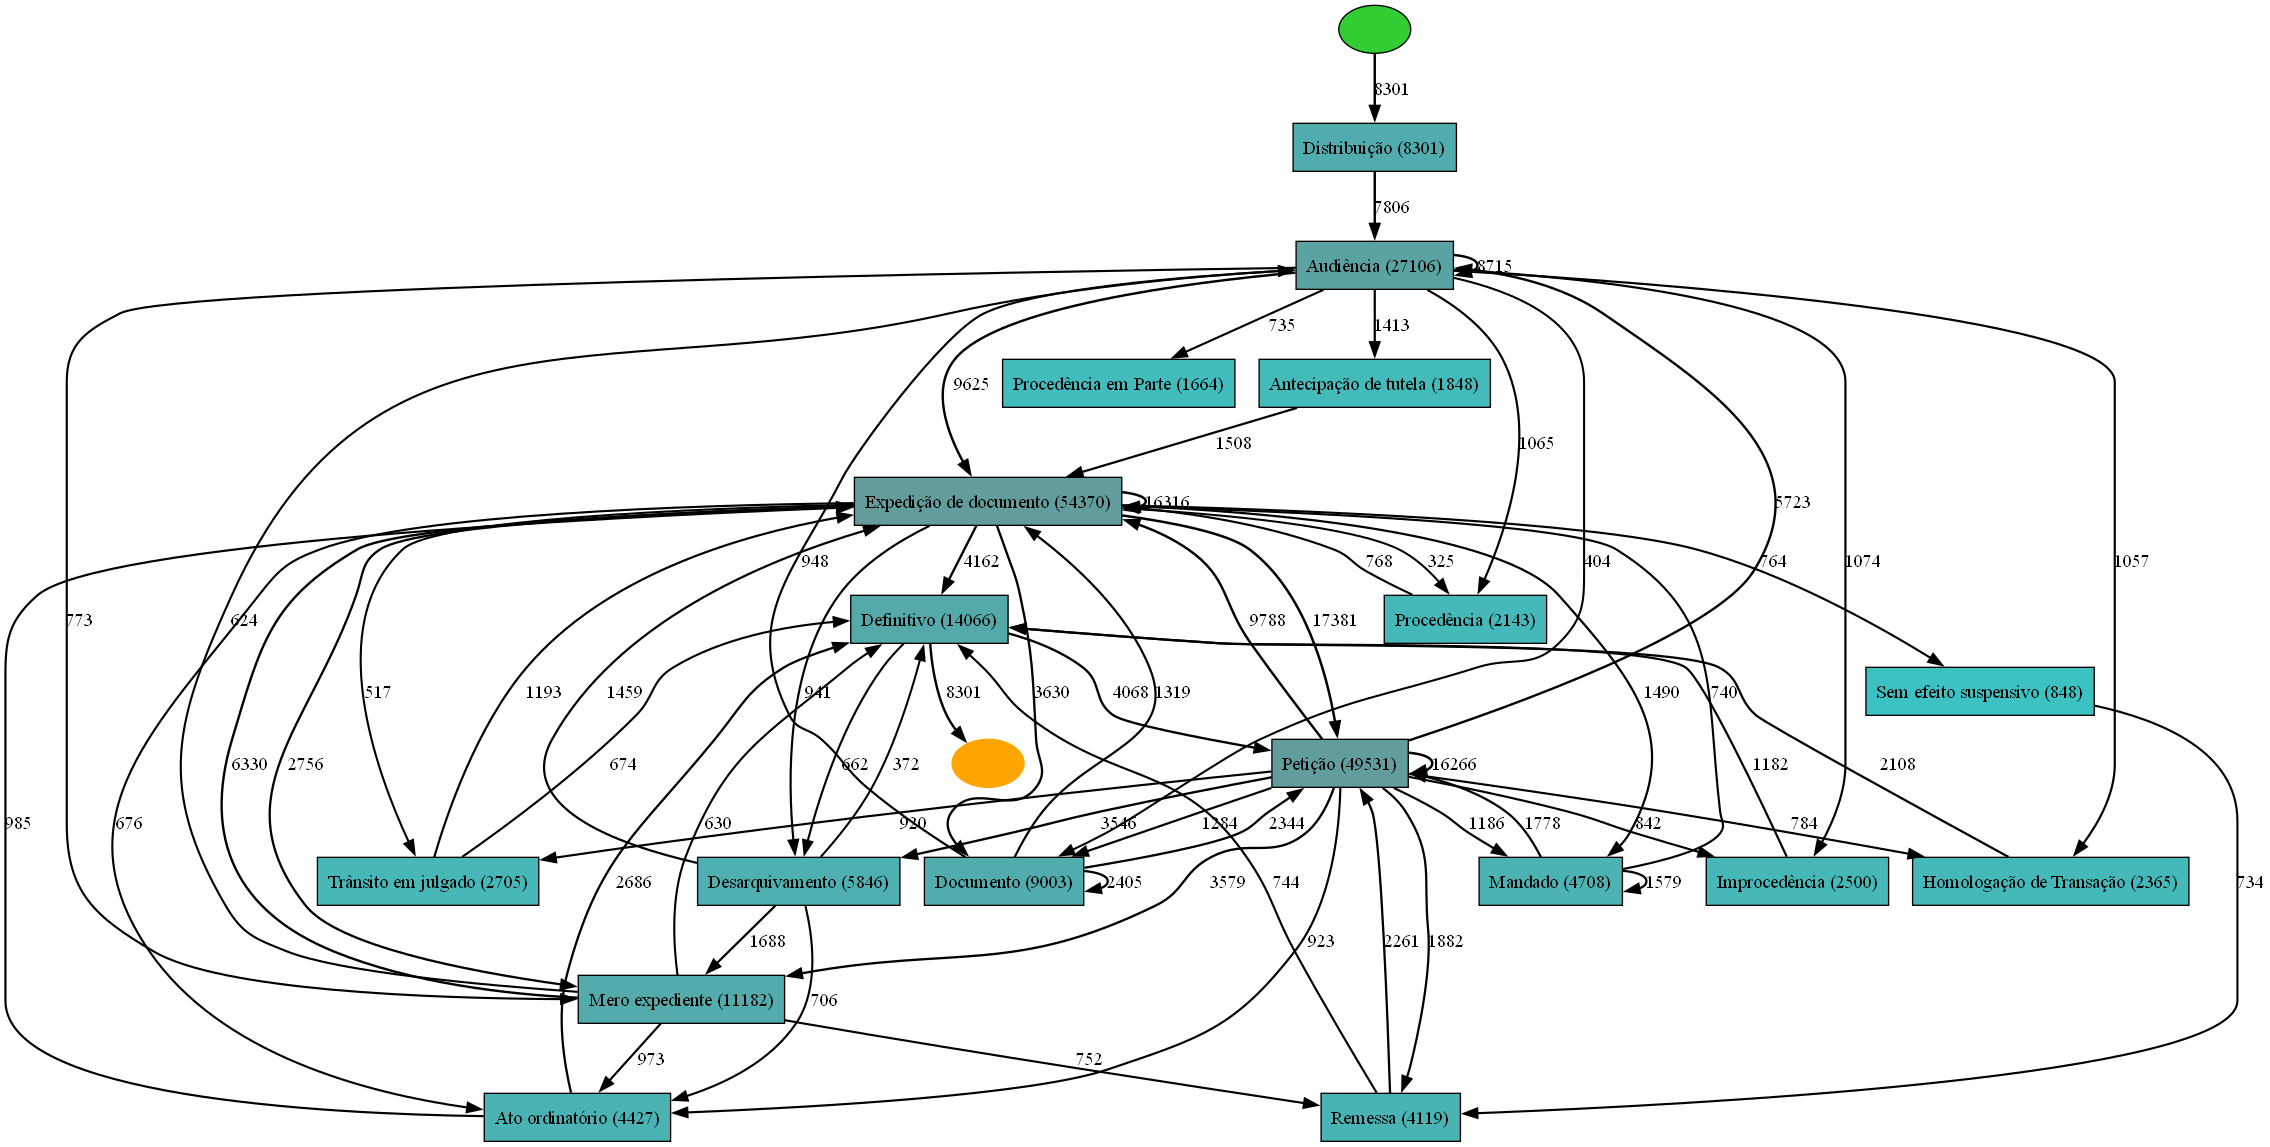

In [366]:
from pm4py.visualization.heuristics_net import visualizer as hn_vis
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner

parameters = {
    "min_act_count": 600, # Quantidade mínima de ocorrências do movimento
    "min_dfg_occurrences": 600 # Quantidade mínima de transações entre movimentos
}

# Aplicar o Heuristics Miner para descobrir o modelo de processo
heu_net = heuristics_miner.apply_heu(event_logs[0], parameters=parameters)

# Visualizar o modelo de processo descoberto
gviz = hn_vis.apply(heu_net)
hn_vis.view(gviz)

#### Unidade 2

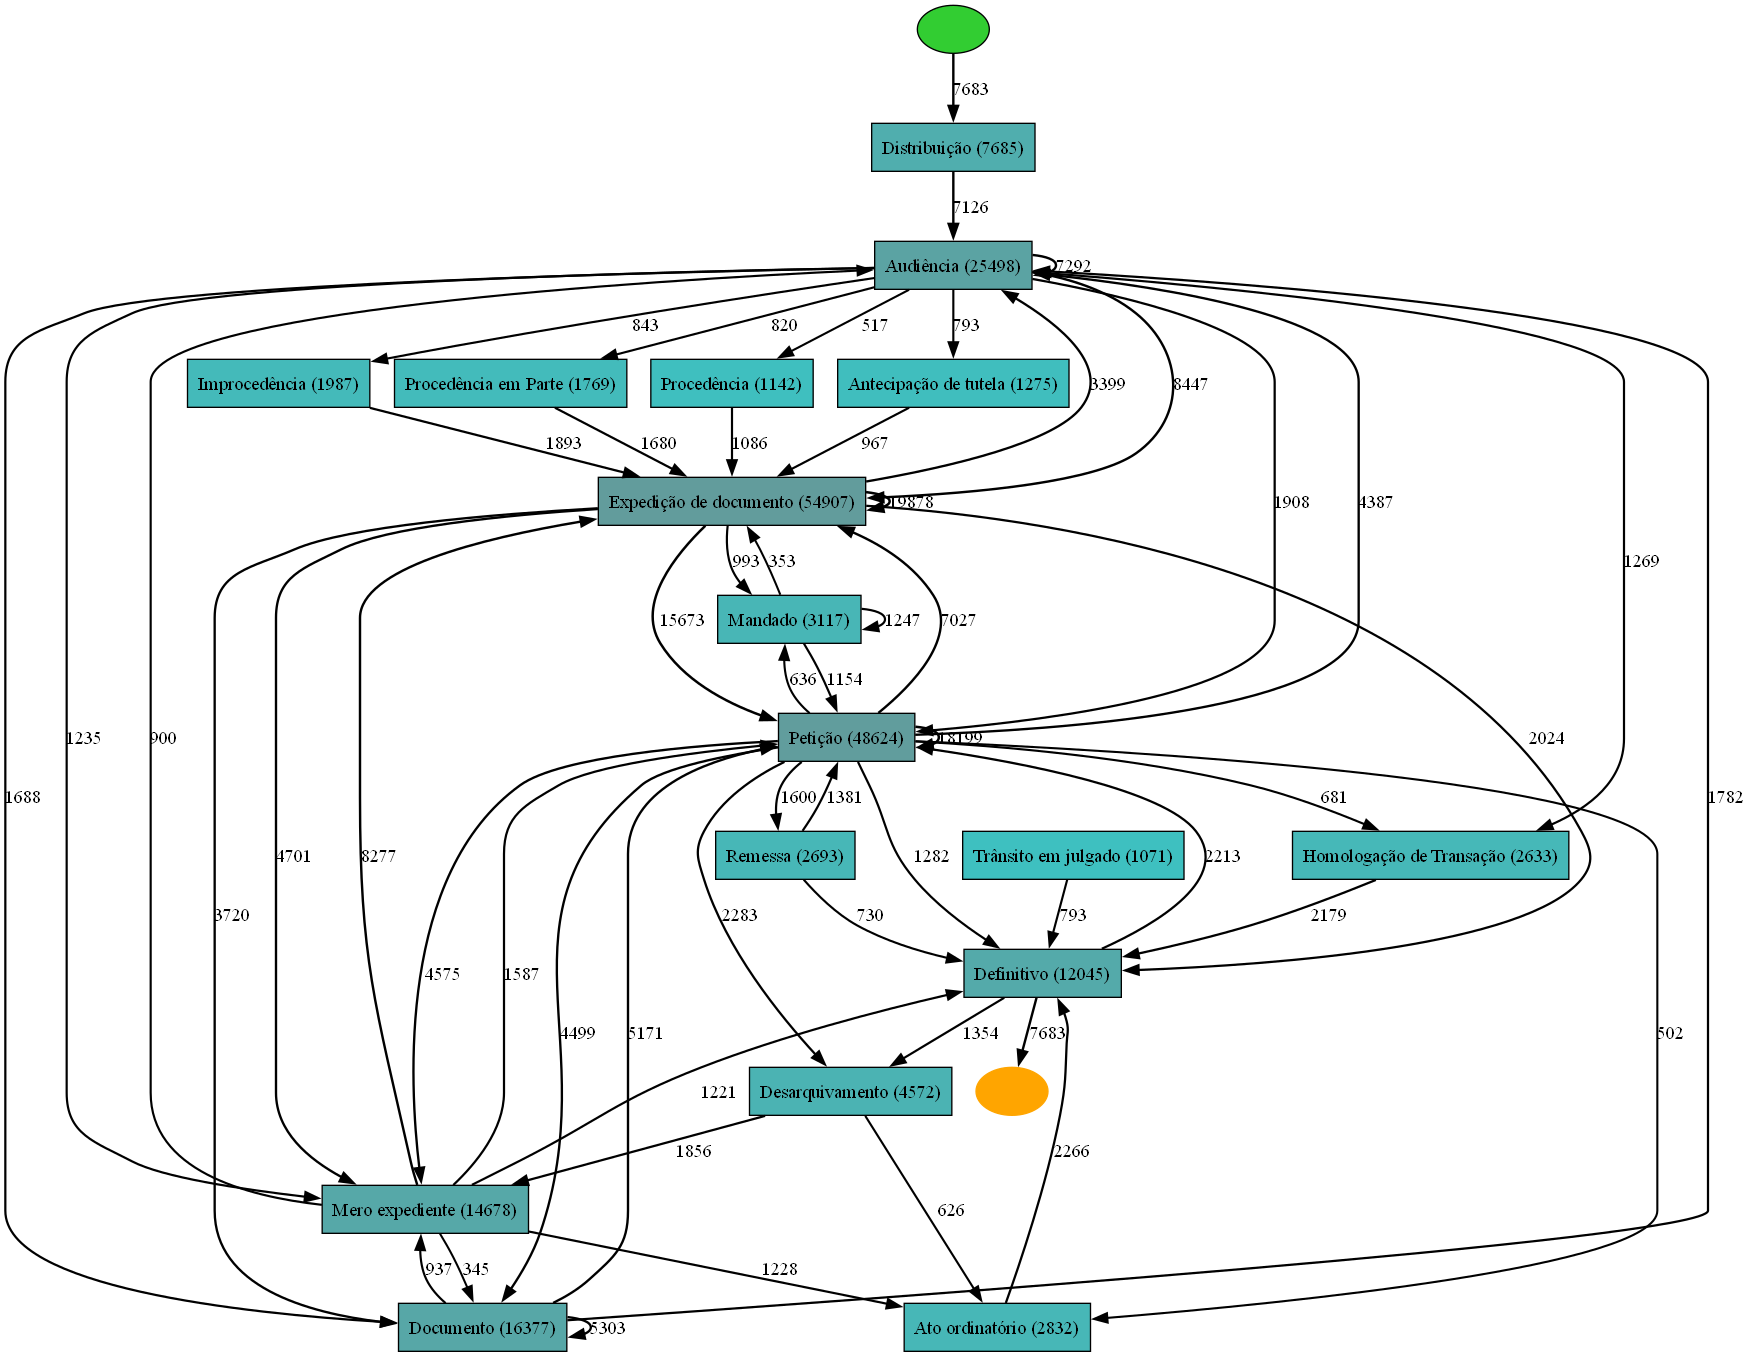

In [367]:
from pm4py.visualization.heuristics_net import visualizer as hn_vis
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner

parameters = {
    "min_act_count": 500, 
    "min_dfg_occurrences": 500 
}

# Aplicar o Heuristics Miner para descobrir o modelo de processo
heu_net = heuristics_miner.apply_heu(event_logs[1], parameters = parameters)

# Visualizar o modelo de processo descoberto
gviz = hn_vis.apply(heu_net)
hn_vis.view(gviz)